In [18]:
import cv2
import numpy as np
from scipy.ndimage import interpolation as inter
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:/Users/Radek/Desktop/Python Projects/Multiple Linear Regression/text_clear.jpg'
image = cv2.imread(image_path)

In [ ]:

gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Method 1: Global Thresholding
_, gray = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY_INV)

In [61]:
img = cv2.imread(image_path)
type(img)
#rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(rgb_image, cmap='gray')

numpy.ndarray

In [63]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
type(gray)
gray.shape
#plt.imshow(gray, cmap='gray')

(3559, 2860)

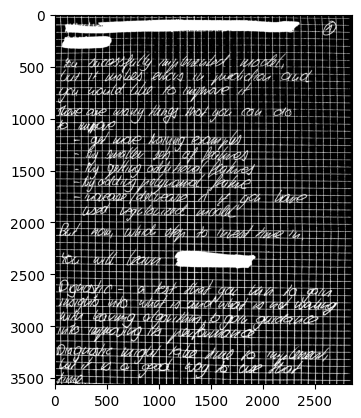

In [126]:

#_, thresh = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,81,17)
_, thresh = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray')
#thresh

In [127]:
# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
horizontal_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))
vertical_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Combine the results to remove both horizontal and vertical lines
lines = cv2.add(horizontal_lines, vertical_lines)
lines_inv = cv2.bitwise_not(lines)

#type(lines)
lines.shape
#plt.imshow(lines, cmap='gray')

(3559, 2860)

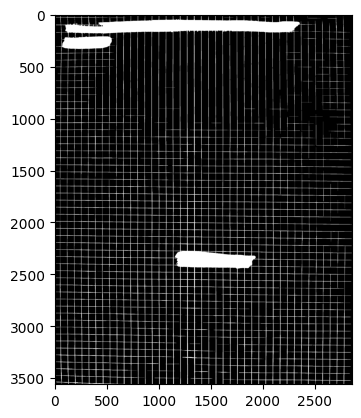

In [128]:
plt.imshow(lines, cmap='gray')

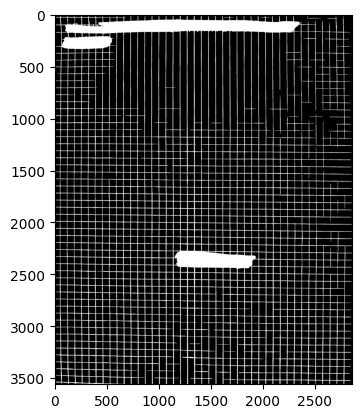

In [130]:
# make every line, horizontal or vertical, thicker, by adding dilation of 1 px
kernel = np.ones((3,3), np.uint8)
lines_dilated = cv2.dilate(lines, kernel, iterations=1)
plt.imshow(lines_dilated, cmap='gray')

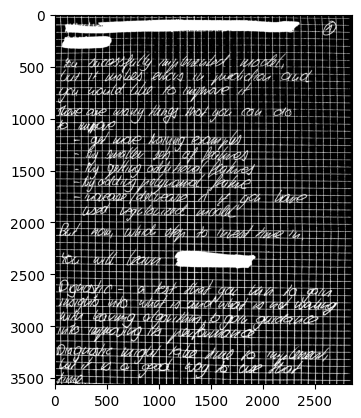

In [131]:
plt.imshow(thresh, cmap='gray')

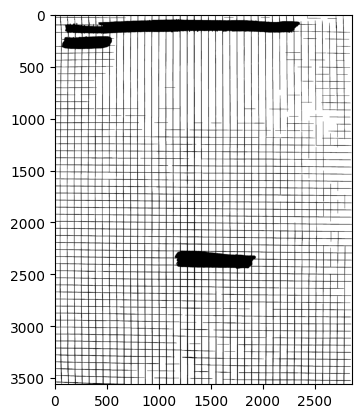

In [132]:
lines_dilated
lines__dilated_inv = cv2.bitwise_not(lines_dilated)
plt.imshow(lines__dilated_inv, cmap='gray')

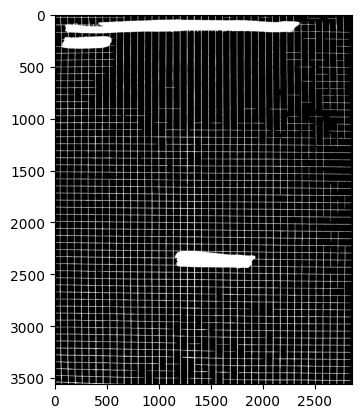

In [133]:
# create a new matrix called combined, such that in matrix gray change values to 255 where lines_inv is 0
# and keep the values in gray where lines_inv is 255
combined = thresh.copy()
combined[lines__dilated_inv == 255] = 0
plt.imshow(combined, cmap='gray')

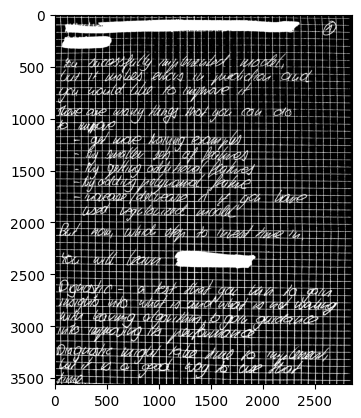

In [134]:
# check if thresh contains something different than 0 or 255
plt.imshow(thresh, cmap='gray')

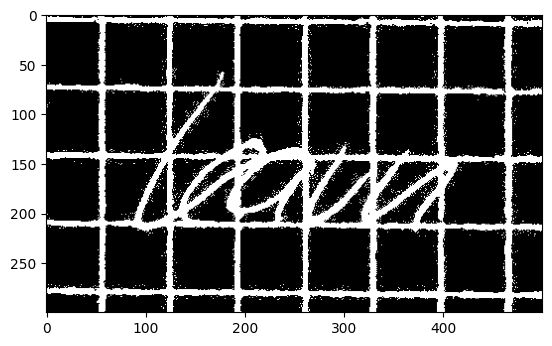

In [140]:
# collect excerpt from both thresh and lines_dilated - rows 2100 t0 2500, columns 1000 to 2000
excerpt_thresh = thresh[2200:2500, 600:1100]
plt.imshow(excerpt_thresh, cmap='gray')



In [125]:
excerpt_thresh

array([[255,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
# write a function, that will loop through every column of the excerpt_thresh matrix and for

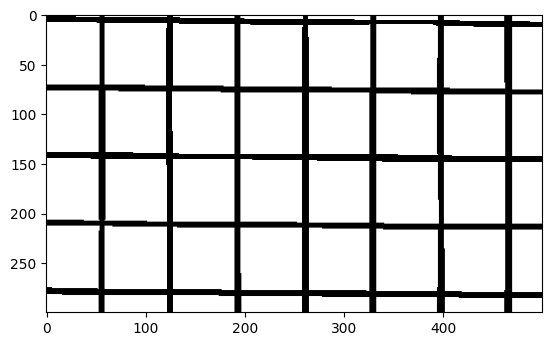

In [141]:
excerpt_lines = lines__dilated_inv[2200:2500, 600:1100]
plt.imshow(excerpt_lines, cmap='gray')

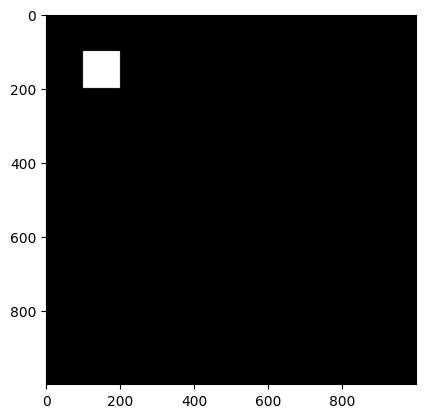

In [116]:
#create numpy.ndarray matrix 1000x1000 filled with zeros
matrix = np.zeros((1000,1000))
# for rows 100-200 and columns 100-200 change values to 255
matrix[100:200,100:200] = 255
plt.imshow(matrix , cmap='gray')
